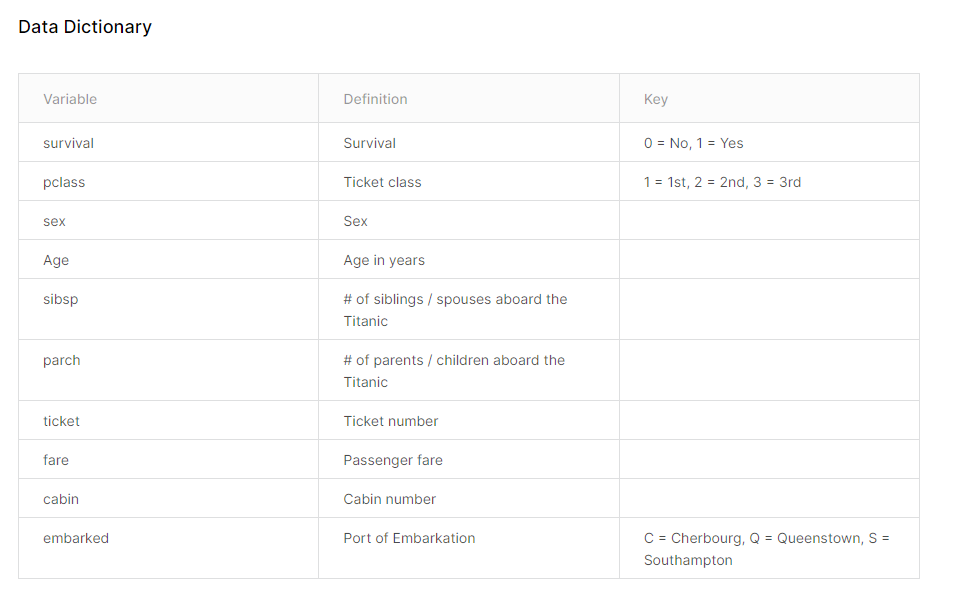

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Загрузка и изучение данных

In [3]:
train = pd.read_csv(r'data\train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
y_train = train[['Survived']] # Labels
X_train_num = train.select_dtypes(include=np.number) # Numerical data
X_train_num = X_train_num.drop('Survived',axis = 1)
X_train_cat = train.select_dtypes(exclude=np.number) # Categories data

## 1.1 Вещественные признаки

In [8]:
X_train_num.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ Проспуски есть только в признаке Age.

## 1.2 Категориальные признаки

In [9]:
X_train_cat.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


+ Много значений отсутствуют в признаке Cabin. Скорее всего его стоит исключить.
+ В признаке Embarked отсутствует 2 значения. В дальнейшем исключим строки с пропущенным значением, либо объявим пропуск как еще одно значения признака.

## 1.3 Баланс классов (Survived)

Исходя из логического смысла задания, просто посмотрим. Не будем выполнять балансировку.

Survived
0           61.616162
1           38.383838
dtype: float64

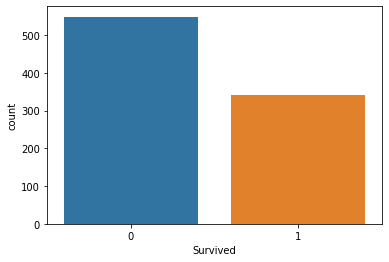

In [10]:
sns.countplot(x='Survived', data=y_train)

y_train.value_counts(normalize=True)*100

# 2. Детальное рассмотрение признаков

## 2.1 Вещественные признаки

In [11]:
X_train_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


Не будет рассмотрен признак:
+ PassangerId - никак не может повлиять на целевой признак, пригодится только при предсказании.

### 2.1.1 Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

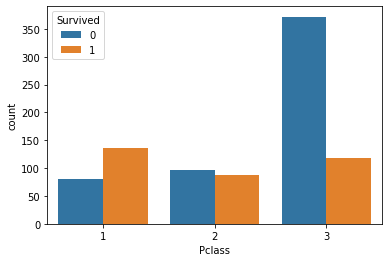

In [12]:
sns.countplot(x='Pclass',hue='Survived', data=train)

In [13]:
print('Number of values: {}'.format(X_train_num['Pclass'].count()))
print('Number of missing values: {}'.format(X_train_num.shape[0] - X_train_num['Pclass'].count()))

Number of values: 891
Number of missing values: 0


+ Как и ожидалось, 1-ый класс с большей вероятностью выживает, в то время как 3-ий имеет значительно меньщую вероятность.
+ Пропущенных значений нет

### 2.1.2 Age

Text(0.5, 1.0, 'Survived distibution')

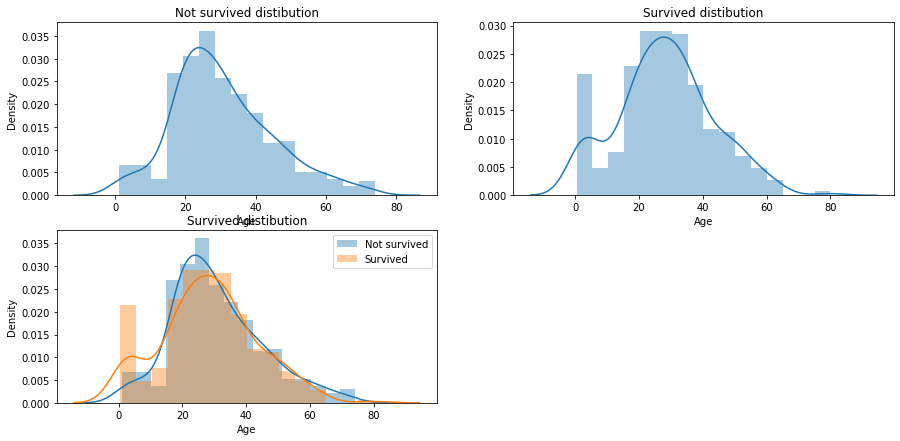

In [14]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(train[train['Survived']==0]['Age'])
plt.title('Not survived distibution')
plt.subplot(2,2,2)
sns.distplot(train[train['Survived']==1]['Age'])
plt.title('Survived distibution')
plt.subplot(2,2,3)
sns.distplot(train[train['Survived']==0]['Age'], label ='Not survived')
sns.distplot(train[train['Survived']==1]['Age'], label ='Survived')
plt.legend()
plt.title('Survived distibution')

In [15]:
print('Number of values: {}'.format(X_train_num['Age'].count()))
print('Number of missing values: {}'.format(X_train_num.shape[0] - X_train_num['Age'].count()))

Number of values: 714
Number of missing values: 177


+ Так как распредления имебт разный вид (Мат.ожидание) и возможно относятся к разным семействам распределения, то этот признак надо оставить.
+ Пропущенные 177 значений в пункте 3(Подготовка признаков) заменим на средние по каждому классу.

### 2.1.3 SibSp

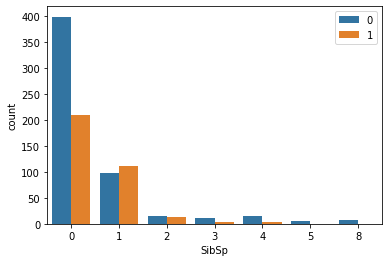

In [16]:
sns.countplot(x='SibSp',hue='Survived', data=train)
plt.legend(loc='upper right')

In [17]:
print('Number of values: {}'.format(X_train_num['SibSp'].count()))
print('Number of missing values: {}'.format(X_train_num.shape[0] - X_train_num['SibSp'].count()))

Number of values: 891
Number of missing values: 0


### 2.1.4 Parch

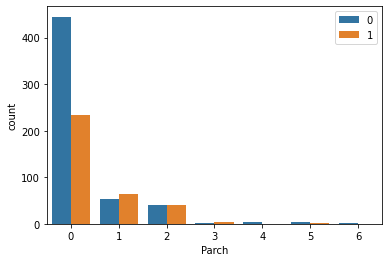

In [18]:
sns.countplot(x='Parch',hue='Survived', data=train)
plt.legend(loc='upper right')

In [19]:
print('Number of values: {}'.format(X_train_num['Parch'].count()))
print('Number of missing values: {}'.format(X_train_num.shape[0] - X_train_num['Parch'].count()))

Number of values: 891
Number of missing values: 0


Количество членов семьи влияет на целевой признак. В дальнейшем стоит объеденить SibSp и Parch в один признак и разбить по группам:
1. has big family(3+)
1. has family(1-3)
1. no family(0)

### 2.1.5 Fare

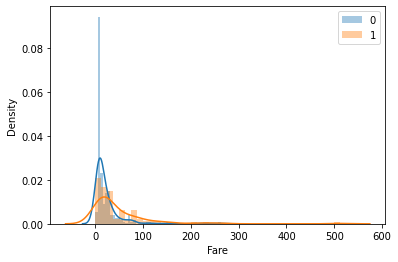

In [20]:
sns.distplot(train[train['Survived'] == 0]['Fare'], label=0)
sns.distplot(train[train['Survived'] == 1]['Fare'], label=1)
plt.legend()

In [21]:
print('Number of values: {}'.format(X_train_num['Fare'].count()))
print('Number of missing values: {}'.format(X_train_num.shape[0] - X_train_num['Fare'].count()))

Number of values: 891
Number of missing values: 0


## 2.2 Категориальные признаки

In [22]:
X_train_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


### 2.2.1 Name

In [23]:
print('Number of values: {}'.format(X_train_cat['Name'].count()))
print('Number of missing values: {}'.format(X_train_cat.shape[0] - X_train_cat['Name'].count()))

Number of values: 891
Number of missing values: 0


### 2.2.2 Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

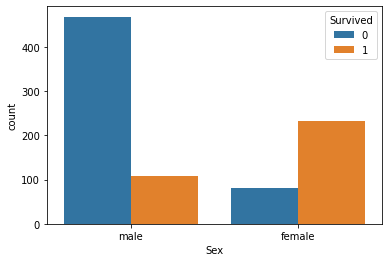

In [24]:
sns.countplot(x='Sex',hue='Survived', data=train)

In [25]:
print('Number of values: {}'.format(X_train_cat['Sex'].count()))
print('Number of missing values: {}'.format(X_train_cat.shape[0] - X_train_cat['Sex'].count()))

Number of values: 891
Number of missing values: 0


Явна видна зависимость между Sex и Survived

### 2.2.3 Ticket

In [26]:
print('Number of values: {}'.format(X_train_cat['Ticket'].count()))
print('Number of missing values: {}'.format(X_train_cat.shape[0] - X_train_cat['Ticket'].count()))

Number of values: 891
Number of missing values: 0


### 2.2.4 Cabin

In [27]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [28]:
print('Number of values: {}'.format(X_train_cat['Cabin'].count()))
print('Number of missing values: {}'.format(X_train_cat.shape[0] - X_train_cat['Cabin'].count()))

Number of values: 204
Number of missing values: 687


Слишком много пропущенных значений

### 2.2.5 Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

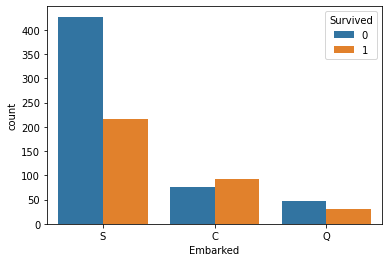

In [29]:
sns.countplot(x="Embarked", hue="Survived", data=train)

In [30]:
print('Number of values: {}'.format(X_train_cat['Embarked'].count()))
print('Number of missing values: {}'.format(X_train_cat.shape[0] - X_train_cat['Embarked'].count()))

Number of values: 889
Number of missing values: 2


Так как у порта отправления с индексом C Survived выше, то однозначно оставляем этот признак

# 3. Подготовка данных.

In [31]:
train_data = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')

In [32]:
y = train_data['Survived']
train_data = train_data.drop('Survived', axis = 1)

In [33]:
test.shape

(418, 11)

In [34]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.1 Вещественные признаки

In [36]:
# Fare
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [37]:
# Age
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [38]:
train_data = train_data.drop('PassengerId', axis = 1)
test_pass_id = test['PassengerId']
test = test.drop('PassengerId', axis = 1)

In [39]:
def family_size(size):
    if size == 0:
        return "Has_not_family"
    elif size <= 3:
        return "Has_family"
    else:
        return "Has_big_family"

In [40]:
train_data['SibSp&Parch'] = train_data['SibSp']+train_data['Parch']
train_data = train_data.drop('SibSp', axis = 1)
train_data = train_data.drop('Parch', axis = 1)

In [41]:
test['SibSp&Parch'] = test['SibSp']+test['Parch']
test = test.drop('SibSp', axis = 1)
test = test.drop('Parch', axis = 1)

In [42]:
train_data["SibSp&Parch"] = train_data["SibSp&Parch"].apply(family_size)
test["SibSp&Parch"] = test["SibSp&Parch"].apply(family_size)

## 3.2 Категориальные признаки

In [43]:
cat_columns = train_data.select_dtypes(exclude=np.number).columns

In [44]:
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'SibSp&Parch'], dtype='object')

In [45]:
train_data[cat_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked,SibSp&Parch
count,891,891,891,204,889,891
unique,891,2,681,147,3,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,Has_not_family
freq,1,577,7,4,644,537


In [46]:
test[cat_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked,SibSp&Parch
count,418,418,418,91,418,418
unique,418,2,363,76,3,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S,Has_not_family
freq,1,266,5,3,270,253


In [47]:
# Del column Cabin
train_data = train_data.drop('Cabin', axis = 1)
test = test.drop('Cabin',axis = 1)

In [48]:
# Del column Name
train_data = train_data.drop('Name', axis = 1)
test = test.drop('Name',axis = 1)

In [49]:
# Del column Ticket
train_data = train_data.drop('Ticket',axis = 1)
test = test.drop('Ticket',axis = 1)

In [50]:
# Del rows where column Embarked is empty
y = y.drop(train_data.loc[train_data['Embarked'].isnull()].index, axis = 0)
train_data = train_data.drop(train_data.loc[train_data['Embarked'].isnull()].index, axis = 0)

In [51]:
# Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_data["Sex"] = le.fit_transform(train_data[["Sex"]].values.ravel())
test["Sex"] = le.fit_transform(test[["Sex"]].values.ravel())

In [52]:
# Encoding
train_data = pd.get_dummies(columns=["Embarked","SibSp&Parch"], data=train_data, drop_first=True)
test = pd.get_dummies(columns=["Embarked","SibSp&Parch"], data=test, drop_first=True)

In [53]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,SibSp&Parch_Has_family,SibSp&Parch_Has_not_family
0,3,1,22.0,7.2500,0,1,1,0
1,1,0,38.0,71.2833,0,0,1,0
2,3,0,26.0,7.9250,0,1,0,1
3,1,0,35.0,53.1000,0,1,1,0
4,3,1,35.0,8.0500,0,1,0,1


In [54]:
test.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,SibSp&Parch_Has_family,SibSp&Parch_Has_not_family
0,3,1,34.5,7.8292,1,0,0,1
1,3,0,47.0,7.0000,0,1,1,0
2,2,1,62.0,9.6875,1,0,0,1
3,3,1,27.0,8.6625,0,1,0,1
4,3,0,22.0,12.2875,0,1,1,0


# 4. Построение моделей

## 4.1 Случайный лес

In [55]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [57]:
rf = RandomForestClassifier()

params = {'n_estimators': [300, 350, 400],
          'max_depth': [3,4,5,7,10],
          'criterion':['gini'],
          'min_samples_leaf' : [1, 3, 5],
          'max_features':['auto'],
          'min_samples_split': [5, 10, 15],
          'max_leaf_nodes':[3,5],
          }

clf = GridSearchCV(estimator=rf ,param_grid=params, cv=10, n_jobs=-1)

In [58]:
%%time
clf.fit(train_data, y)

Wall time: 2min 13s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=34),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 4, 5, 7, 10],
                         'max_features': ['auto'], 'max_leaf_nodes': [3, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [300, 350, 400]})

In [75]:
print(clf.best_estimator_)
print(clf.best_score_)

RandomForestClassifier(max_depth=4, max_leaf_nodes=5, min_samples_split=5,
                       n_estimators=300, random_state=34)
0.8054136874361593


In [76]:
rf_best = clf.best_estimator_

y_pred = clf.predict(test)

## Посмотрим какие признаки наиболее важны

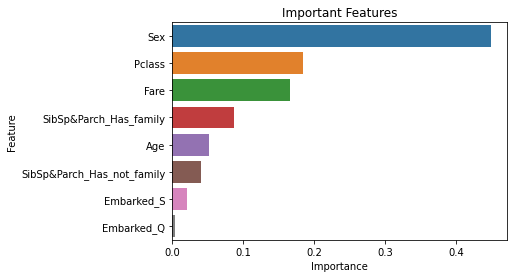

In [77]:
importance = pd.Series(rf_best.feature_importances_,index=train_data.columns).sort_values(ascending=False)

sns.barplot(x=importance, y=importance.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Important Features")
plt.show()

## Создадим модель с параметрами, полученными на GridSearchCV.

In [84]:
rf_clf = RandomForestClassifier(max_depth=4, max_leaf_nodes=5, min_samples_split=5,
                       n_estimators=300, random_state=34)

In [85]:
rf_clf.fit(train_data, y)

RandomForestClassifier(max_depth=4, max_leaf_nodes=5, min_samples_split=5,
                       n_estimators=300, random_state=34)

In [86]:
ans = rf_clf.predict(test)

In [87]:
def save_ans(ans, pasanger_id, name_alg):
    submission = pd.DataFrame({'PassengerId':pasanger_id,'Survived':ans})
    submission.Survived = submission.Survived.astype(int) # не надо, наверное
    print(submission.shape) 
    filename = r'data\answers\{}.csv'.format(name_alg)
    submission.to_csv(filename,index=False)
    print('Saved file: ' + filename)

In [88]:
save_ans(ans, test_pass_id, 'random_forest')

(418, 2)
Saved file: data\answers\random_forest.csv
